In [1]:
# dependencies

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sqlalchemy import create_engine

import datetime

# postgres pull

db_password = "postgres"
db_user = "postgres"
db_name = "Youtube P3"
endpoint = 'youtube.cb1bticre0py.us-east-1.rds.amazonaws.com'

connection_string = f"postgresql://{db_user}:{db_password}@{endpoint}:5432/{db_name}"
engine = create_engine(connection_string)

slimmer_unique = pd.read_sql('SELECT * FROM final_unique;', con = engine)


In [2]:
slimmer_unique.head()

,index,video_id,category,category_e,country,publish_date,trending_date,publish_to_trend,publish_day,publish_day_num,...,pt_dislikes,wt_dislikes,pt_dislikes_rate,wt_dislikes_rate,comments,pt_comments,wt_comments,pt_comments_rate,wt_comments_rate,comments_ratio
0,0,e_Z6upbeYuc,Entertainment,3.0,Russia,2020-08-12,2020-08-15,3.0,Wednesday,2,...,29927.0,34070.0,9975.67,8517.50,117527.0,63557.0,53970.0,21185.67,13492.5,0.92
1,1,Ou5ksu78utU,News & Politics,8.0,Russia,2020-08-10,2020-08-12,2.0,Monday,0,...,394.0,0.0,197.00,0.00,1226.0,1226.0,0.0,613.00,0.0,0.46
2,2,JW8GQfT5cNU,Science & Technology,12.0,Russia,2020-08-11,2020-08-12,1.0,Tuesday,1,...,207.0,0.0,207.00,0.00,422.0,422.0,0.0,422.00,0.0,0.52
3,3,Do51eJowSyg,Gaming,5.0,Russia,2020-08-10,2020-08-12,2.0,Monday,0,...,491.0,0.0,245.50,0.00,5043.0,5043.0,0.0,2521.50,0.0,0.58
4,4,KJi2qg5F-9E,Music,7.0,Germany,2020-08-11,2020-08-17,6.0,Tuesday,1,...,970.0,691.0,161.67,115.17,4157.0,3311.0,846.0,551.83,141.0,0.33


In [3]:
#slimmer_unique=pd.read_csv('https://elasticbeanstalk-us-west-1-140033263198.s3.us-west-1.amazonaws.com/cleaned.csv')  

In [4]:
# X = slim_unique.drop(columns = 'target').values

# y = slim_unique['target'].values
#X = slimmer_unique.filter([ 'category','publish_to_trend','likes_ratio','comments_ratio',"views","likes","dislikes", "comments"], axis=1)
X = slimmer_unique.filter([     'category_e',
    'publish_to_trend',
    'publish_day_num',
    'pt_views',
    'pt_likes',
    'pt_dislikes',
    'pt_comments',
    'likes_ratio',
    'comments_ratio'])

# y = slim_unique['target'].values
#X = slimmer_unique.filter(['category','publish_to_trend','likes_ratio','comments_ratio'], axis=1)
# X = slimmer_unique.drop(columns = ['target', 'trend_days']).values
slimmer_unique['trending_bins'] = pd.qcut(slimmer_unique['trend_days'], q=2, precision=0)

slimmer_unique['trending_codes'] = pd.Categorical(slimmer_unique['trending_bins']).codes
y = slimmer_unique['trending_codes'].values


In [5]:
X.head()


,category_e,publish_to_trend,publish_day_num,pt_views,pt_likes,pt_dislikes,pt_comments,likes_ratio,comments_ratio
0,3.0,3.0,2,5173063.0,1052986.0,29927.0,63557.0,12.47,0.92
1,8.0,2.0,0,267945.0,3040.0,394.0,1226.0,1.13,0.46
2,12.0,1.0,1,81049.0,5684.0,207.0,422.0,7.01,0.52
3,5.0,2.0,0,872005.0,52371.0,491.0,5043.0,6.01,0.58
4,7.0,6.0,1,573902.0,69319.0,970.0,3311.0,7.06,0.33


In [6]:

print(X.shape)
print(y.shape)
print(slimmer_unique['trending_bins'])


(241112, 9)
(241112,)
0          (0.0, 4.0]
1          (0.0, 4.0]
2          (0.0, 4.0]
3          (0.0, 4.0]
4         (4.0, 37.0]
             ...     
241107     (0.0, 4.0]
241108     (0.0, 4.0]
241109     (0.0, 4.0]
241110     (0.0, 4.0]
241111     (0.0, 4.0]
Name: trending_bins, Length: 241112, dtype: category
Categories (2, interval[float64, right]): [(0.0, 4.0] < (4.0, 37.0]]


In [7]:
y


array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

<AxesSubplot:ylabel='Frequency'>

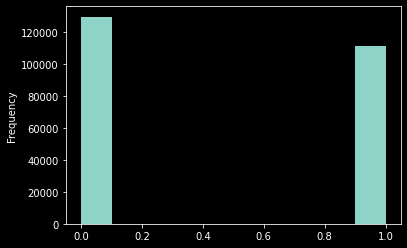

In [8]:

slimmer_unique['trending_codes'].plot(kind='hist')



In [9]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
import sklearn as skl

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()


In [10]:
X_test

,category_e,publish_to_trend,publish_day_num,pt_views,pt_likes,pt_dislikes,pt_comments,likes_ratio,comments_ratio
51554,11.0,4.0,6,53014.0,6725.0,74.0,453.0,11.53,0.67
120091,5.0,6.0,6,478628.0,54589.0,309.0,5368.0,7.28,0.58
201111,0.0,7.0,3,800749.0,90071.0,308.0,3574.0,8.47,0.30
102875,3.0,3.0,2,106722.0,11753.0,108.0,684.0,7.44,0.37
112477,3.0,8.0,5,6110235.0,734793.0,5889.0,72325.0,7.22,0.61
...,...,...,...,...,...,...,...,...,...
147719,7.0,4.0,1,625579.0,53952.0,389.0,3619.0,6.79,0.42
87548,10.0,3.0,5,553210.0,33514.0,378.0,1564.0,5.19,0.23
9255,3.0,5.0,6,391549.0,6391.0,90.0,318.0,1.45,0.07
229352,3.0,2.0,2,1129215.0,44861.0,308.0,1785.0,3.55,0.13


In [11]:

# Fit the scaler
X_scaler.fit(X_train)


StandardScaler()

In [12]:

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)




In [13]:
import tensorflow as tf
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
import keras
from keras.wrappers.scikit_learn import KerasClassifier

In [14]:
#Create a Keras Sequential model and add more than one Dense hidden layer
nn_model = tf.keras.models.Sequential()

nn_model.add(tf.keras.layers.Dense(units=10, activation="relu", input_dim=9))

nn_model.add(tf.keras.layers.Dense(units=10, activation="relu"))

nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                100       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compile the model and train over more than 100 epochs
loss_fn = keras.losses.mean_squared_error
nn_model.compile(loss=loss_fn, optimizer="adam", metrics=["accuracy"])
#nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
5652/5652 [==============================] - 20s 3ms/step - loss: 0.0544 - accuracy: 0.9306
Epoch 2/5
5652/5652 [==============================] - 22s 4ms/step - loss: 0.0453 - accuracy: 0.9426
Epoch 3/5
5652/5652 [==============================] - 31s 5ms/step - loss: 0.0450 - accuracy: 0.9426
Epoch 4/5
5652/5652 [==============================] - 33s 6ms/step - loss: 0.0448 - accuracy: 0.9427
Epoch 5/5
5652/5652 [==============================] - 20s 3ms/step - loss: 0.0446 - accuracy: 0.9426


In [16]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                100       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Evaluate the performance of model using the loss and predictive accuracy of the model on the test dataset.
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1884/1884 - 5s - loss: 0.0442 - accuracy: 0.9426 - 5s/epoch - 3ms/step
Loss: 0.04415183514356613, Accuracy: 0.9425827264785767


In [18]:
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# print(confusion_matrix(y_test,y_pred))

In [40]:
# # save the model
from pickle import dump, load
from sklearn.metrics import accuracy_score
# dump(nn_model, open('./models/model.pkl', 'wb'))

# Use H5 format since Pkl format was giving issues
nn_model.save('model.h5')
#Used Pkl for model columns
model_columns = list(X_test.columns)
dump(model_columns, open('model_columns.pkl', 'wb'))

# save the scaler using pickle format 
dump(X_scaler, open('scaler.pkl', 'wb'))



In [41]:
#load the h5 model 
reconstructed_model=keras.models.load_model('model.h5')

# load the scaler uing pickle format.
scaler = joblib.load('./scaler.pkl')
#load the columns usinf pickle format
columns = joblib.load ('./model_columns.pkl')



In [42]:
index=1000
# test_input=X_test.iloc[1,:].values.reshape(-1, 1)
# test_target=y_test[0:1].reshape(-1, 1)
columns
len(columns)

9

In [43]:


test_input=X_test.iloc[index,:].values.tolist()
# test_input=[[0,6, 6, 47, 54, 3, 5, 7, 0.5]]
test_target=y_test[index]
len(test_input)



9

In [44]:

test_input_df = pd.DataFrame ([test_input], columns = columns)
test_input


[1.0, 5.0, 6.0, 664002.0, 43748.0, 889.0, 7924.0, 5.3, 0.9]

In [45]:
test_input_df



,category_e,publish_to_trend,publish_day_num,pt_views,pt_likes,pt_dislikes,pt_comments,likes_ratio,comments_ratio
0,1.0,5.0,6.0,664002.0,43748.0,889.0,7924.0,5.3,0.9


In [46]:


test_input_scaled = scaler.transform(test_input_df)

In [47]:
test_input_scaled

array([[-1.38321674,  0.12927396,  1.52594166,  0.04624986,  0.04369425,
         0.01210345,  0.37018281, -0.11510805,  0.60731149]])

In [48]:

# reconstructed_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
# score = reconstructed_model.evaluate(test_input, test_target, verbose=0)
# print("%s: %.2f%%" % (reconstructed_model.metrics_names[1], score[1]*100))

# The reconstructed model is already compiled and has retained the optimizer
# state, so training can resume:
# reconstructed_model.fit(test_input_scaled, test_target)
# score = reconstructed_model.evaluate(test_input_scaled, test_target, verbose=0)
# print("%s: %.2f%%" % (reconstructed_model.metrics_names[1], score[1]*100))

test_target_hat = reconstructed_model.predict(test_input_scaled)
# evaluate accuracy



1/1 [==============================] - 5s 5s/step


In [49]:

print(test_target_hat)


[[0.8713457]]


In [50]:
len(test_target_hat)
test_target_hat[test_target_hat > 0.5] = 1
test_target_hat[test_target_hat <= 0.5] = 0



In [51]:
print(test_target_hat)
print(test_target)

[[1.]]
1


In [52]:

#acc = accuracy_score(test_target, test_target_hat)
#print('Test Accuracy:', acc)

NameError: name 'acc' is not defined